# importing necessary libraries
Requirements and Installation



In [ ]:
!pip install flair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 25.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 24.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB

In [ ]:
import flair

In [ ]:
import pandas as pd



In [ ]:
import numpy as np

In [ ]:
import seaborn as sns

# trying the flair lib
note : This isn't required ,im simply experimenting with the flair library.

In [ ]:
from flair.data import Sentence
from flair.nn import Classifier

# make a sentence
sentence = Sentence("i love berlin ! ")


# load the ner taggerr
tagger=Classifier.load('ner')

#run NER over sentence
tagger.predict(sentence)

# print the sentence with all annotations
print(sentence)

2023-09-04 11:14:49,096 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, S-ORG, S-MISC, B-PER, E-PER, S-LOC, B-ORG, E-ORG, I-PER, S-PER, B-MISC, I-MISC, E-MISC, I-ORG, B-LOC, E-LOC, I-LOC, <START>, <STOP>
Sentence[4]: "i love berlin !" → ["berlin"/LOC]


In [ ]:
# make a sentence
sentence = Sentence('I love Berlin .')

# load the NER tagger
tagger = Classifier.load('sentiment')

# run NER over sentence
tagger.predict(sentence)

# print the sentence with all annotations
print(sentence)

2023-09-04 11:14:50,879 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmpbfq1vr32


100%|██████████| 253M/253M [00:12<00:00, 21.1MB/s]

2023-09-04 11:15:04,021 copying /tmp/tmpbfq1vr32 to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2023-09-04 11:15:05,044 removing temp file /tmp/tmpbfq1vr32


Sentence[4]: "I love Berlin ." → POSITIVE (0.9983)


In [ ]:
from flair.embeddings import WordEmbeddings, FlairEmbeddings, DocumentLSTMEmbeddings
from flair.models import TextClassifier
from flair.trainers import ModelTrainer
from pathlib import Path

In [ ]:
#test flair lib
classifier = TextClassifier.load('en-sentiment')
sentence = Sentence('Flair is pretty neat!')
classifier.predict(sentence)
# print sentence with predicted labels
print('Sentence above is: ', sentence.labels)

Sentence above is:  ['Sentence[5]: "Flair is pretty neat!"'/'POSITIVE' (0.9997)]


# first , import the csv file

In [ ]:
import os
current_directory = os.getcwd()
print(current_directory)

/content


In [ ]:
#commend to import the csv file
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/flairtext/offensive_vs_non_offensive.csv")

In [ ]:
#a commend to check thee data set
df

,Unnamed: 0,clean_tweet,class,labels
0,0,look at what you just said lls new era girl ...,1,offensive
1,1,driving the fucktardmobile tranny slips and a...,1,offensive
2,2,if i ever put ma trust ina bitch i will alwa...,1,offensive
3,3,stop twatching me bitch,1,offensive
4,4,you know bitches be mad when they be lik...,1,offensive
...,...,...,...,...
4666,4666,this bitch gonna steal a police uniform and th...,1,offensive
4667,4667,if california chrome does not go off at even m...,1,offensive
4668,4668,i do not love you hoes,1,offensive
4669,4669,lmaoooo white people lmaoo filth ...,1,offensive


In [ ]:
#commend to check the number of the offensive and non offensive labels 
df.groupby("labels").count()

,Unnamed: 0,clean_tweet,class
labels,,,
non_offensive,821,821,821
offensive,3850,3850,3850


<Axes: xlabel='labels', ylabel='count'>

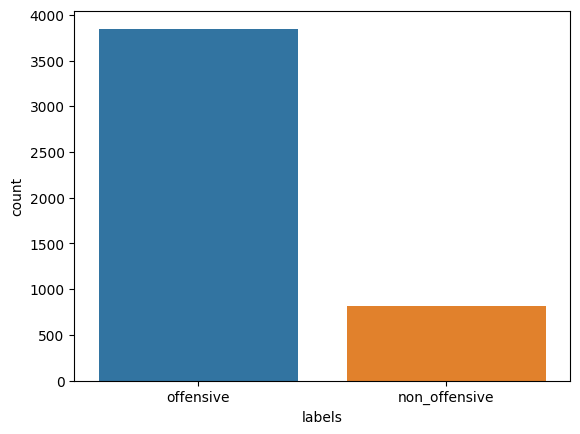

In [ ]:
sns.countplot(x="labels", data=df)

In [ ]:
#name of the columns
df.columns

Index(['Unnamed: 0', 'clean_tweet', 'class', 'labels'], dtype='object')

#spilt the data into fast text and csv data then split both of them into  3 sets dev/train/test

In [ ]:
#spilt the data into fst
#you can train your model with the csv extention or the fast text , Both are feasible.

In [ ]:
#am changing the columns names 
df1 = df[['clean_tweet','labels']]
df1.columns  = ['text','labels']
df1
df1.head()
df1.head()
df_fst = df1.copy()
df_fst.head()
#flair format to create the fast text label 
'__label__' + df_fst['labels'].astype(str)
df_fst['labels'] = '__label__' + df_fst['labels'].astype(str)
df_fst = df_fst[['labels','text']]
train,test,dev = np.split(df1,[int(.6*len(df1)),int(.8*len(df1))])
print(df1.shape)
print(train.shape)
print(test.shape)
print(dev.shape)

(4671, 2)
(2802, 2)
(934, 2)
(935, 2)


In [ ]:
#spliting the csv file into data/dev/train 
!mkdir -p data
train.to_csv("data/train.csv")
test.to_csv("data/test.csv")
dev.to_csv("data/dev.csv")
train_fst,test_fst,dev_fst = np.split(df_fst,[int(.6*len(df_fst)),int(.8*len(df_fst))])

In [ ]:
#spliting the fast text file into data / dev / train 
!mkdir -p data_fst
train_fst.to_csv("data_fst/train.csv", sep='\t', index=False, header=False)
test_fst.to_csv("data_fst/test.csv", sep='\t', index=False, header=False)
dev_fst.to_csv("data_fst/dev.csv", sep='\t', index=False, header=False)

In [ ]:
# you're free , you can choose to work with the csv file or the fast text , both are feasible 

In [ ]:
df1.columns

Index(['text', 'labels'], dtype='object')

#working with the csv data set

In [ ]:
# here i need to map the columuns 

In [ ]:
column_name_map = {2:"labels",1:"text"}

In [ ]:
# variable 

In [ ]:
data_folder = 'data/'

In [ ]:
#In order to generate the corpus, I need to specify the label_type; if dealing with a csv file, labels should be used as the label type. When working with a quick text file, utilize class as the label type. 

In [ ]:
label_type="labels"

In [ ]:
from flair.data import Corpus
from flair.datasets import CSVClassificationCorpus
from flair.data import Sentence
from flair.embeddings import WordEmbeddings
from flair.models import TextClassifier
from flair.trainers import ModelTrainer

In [ ]:
#corpus: This is a variable that will store the corpus object, which is essentially a dataset that is suitable for text classification tasks. The corpus will be created in the following lines of code.

#CSVClassificationCorpus: This is likely a class or function provided by a specific library or framework for working with text data in CSV format. It's used to prepare the dataset for text classification.

#data_folder: This is the path to the folder where your CSV dataset is located. The code assumes that your dataset is stored in this folder.

#column_name_map: This is likely a dictionary that maps the column names in your CSV file to specific roles or attributes in the text classification task. For example, it might map columns like "text" to the input text data and "label" to the corresponding labels.

#skip_header=True: This parameter indicates whether the first row of the CSV file should be skipped because it typically contains headers or column names. By setting it to True, the code will skip the first row.

#delimiter=',': This parameter specifies the delimiter used in the CSV file to separate values. In this case, it's set to a comma (,), which is the standard delimiter for CSV files.

#label_type: This parameter likely specifies the data type or format of the labels in your dataset. It could be binary labels (e.g., "spam" or "not spam"), multi-class labels (e.g., categories), or some other format specific to your classification task.

In [ ]:
corpus = CSVClassificationCorpus(data_folder,
                                         column_name_map,
                                         skip_header=True,
                                         delimiter=',',
                                 label_type=label_type)

2023-09-04 11:15:17,519 Reading data from data
2023-09-04 11:15:17,521 Train: data/train.csv
2023-09-04 11:15:17,523 Dev: data/dev.csv
2023-09-04 11:15:17,524 Test: data/test.csv


In [ ]:
corpus.train[0]

Sentence[18]: "  look at what you just said lls new era girl bye kill bitches w kindness ampamp wht cousin" → offensive (1.0)

In [ ]:
#label_dict = corpus.make_label_dictionary(label_type=label_type): This line of code creates a label dictionary based on the text classification corpus (corpus) you've prepared earlier. The purpose of a label dictionary is to map labels to unique integer indices. This is often done in machine learning and natural language processing to represent categorical labels in a numerical format that can be used in models.

#label_type: This parameter likely specifies the type or format of the labels you are working with. For example, if you have binary labels ("spam" and "not spam") or multi-class labels (categories like "sports," "entertainment," "politics," etc.), this parameter tells the make_label_dictionary function how to handle these labels.
#label_dict.get_item_for_index(1): This line of code retrieves an item (a label) from the label dictionary by specifying its index. In this case, it's trying to retrieve the label corresponding to index 1.

#Here's what each part does:

#label_dict: This variable now holds the label dictionary created earlier. It's a data structure that associates labels with unique integer indices.

#.get_item_for_index(1): This method of the label dictionary is used to retrieve the label associated with a particular index. In this case, it's looking for the label at index 1.

#So, when you run label_dict.get_item_for_index(1), it will return the label that corresponds to the integer index 1 as defined in your label dictionary. This can be useful if you need to map integer labels back to their original categorical values for interpretation or evaluation of your classification model.

#For example, if your labels were "0" for "positive" and "1" for "negative," running label_dict.get_item_for_index(1) might return "negative" as the result, which is the label corresponding to index 1 in your label dictionary.

In [ ]:
label_dict = corpus.make_label_dictionary(label_type=label_type)
label_dict.get_item_for_index(1)

2023-09-04 11:15:17,640 Computing label dictionary. Progress:


2802it [00:01, 1873.04it/s]

2023-09-04 11:15:19,153 Dictionary created for label 'labels' with 3 values: offensive (seen 2312 times), non_offensive (seen 490 times)


'offensive'

#document embeddings set up

In [ ]:
from flair.embeddings import TransformerDocumentEmbeddings
from flair.trainers import ModelTrainer

In [ ]:
#document_embeddings: This is a variable that will store the document embedding model once it's initialized. Document embeddings are numerical representations of text documents that capture the semantic meaning of the text, making it suitable for various natural language processing (NLP) tasks.

#TransformerDocumentEmbeddings: This is likely a class or function provided by an NLP library or framework like Hugging Face Transformers or spaCy. It's used to create document embeddings using transformer-based models, which are deep learning models specifically designed for NLP tasks.

#'distilbert-base-uncased': This is the name or identifier of a specific pre-trained transformer-based model. In this case, it's "distilbert-base-uncased." Each model has a name that corresponds to its architecture and pre-training data. "uncased" indicates that the model has been trained on lowercase text, which means it's not case-sensitive.

#fine_tune=True: This parameter indicates whether the pre-trained model should be fine-tuned on your specific task or dataset. Fine-tuning allows the model to adapt to your data and potentially improve its performance on your specific NLP task. Setting it to True means that the model will be fine-tuned.

#Here's what this code does:

#It initializes a document embedding model using the "distilbert-base-uncased" transformer-based architecture.

#This model is capable of producing dense vector representations (embeddings) for text documents.

#By setting fine_tune=True, you indicate that you want to further train this model on your specific task or dataset, potentially improving its ability to understand the context and semantics of your text data.

In [ ]:
document_embeddings = TransformerDocumentEmbeddings('distilbert-base-uncased', fine_tune=True)

In [ ]:
classifier=TextClassifier(document_embeddings, label_dictionary=label_dict, label_type=label_type)
trainer = ModelTrainer(classifier, corpus)


trainer.fine_tune('data/',
                  learning_rate=5.0e-5,
                  mini_batch_size=32,
                  max_epochs=19,
                  )

2023-09-04 11:15:25,711 ----------------------------------------------------------------------------------------------------
2023-09-04 11:15:25,720 Model: "TextClassifier(
  (embeddings): TransformerDocumentEmbeddings(
    (model): DistilBertModel(
      (embeddings): Embeddings(
        (word_embeddings): Embedding(30523, 768)
        (position_embeddings): Embedding(512, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (transformer): Transformer(
        (layer): ModuleList(
          (0-5): 6 x TransformerBlock(
            (attention): MultiHeadSelfAttention(
              (dropout): Dropout(p=0.1, inplace=False)
              (q_lin): Linear(in_features=768, out_features=768, bias=True)
              (k_lin): Linear(in_features=768, out_features=768, bias=True)
              (v_lin): Linear(in_features=768, out_features=768, bias=True)
              (out_lin): Linear(in_features=768, out

100%|██████████| 30/30 [00:59<00:00,  1.99s/it]

2023-09-04 11:26:05,368 Evaluating as a multi-label problem: False
2023-09-04 11:26:05,393 DEV : loss 0.1777479648590088 - f1-score (micro avg)  0.9294


2023-09-04 11:26:05,604 ----------------------------------------------------------------------------------------------------
2023-09-04 11:26:59,725 epoch 2 - iter 8/88 - loss 0.18152776 - time (sec): 54.12 - samples/sec: 4.73 - lr: 0.000029
2023-09-04 11:27:48,580 epoch 2 - iter 16/88 - loss 0.15980793 - time (sec): 102.97 - samples/sec: 4.97 - lr: 0.000031
2023-09-04 11:28:45,511 epoch 2 - iter 24/88 - loss 0.13733610 - time (sec): 159.90 - samples/sec: 4.80 - lr: 0.000033
2023-09-04 11:29:37,834 epoch 2 - iter 32/88 - loss 0.12345028 - time (sec): 212.23 - samples/sec: 4.83 - lr: 0.000036
2023-09-04 11:30:29,290 epoch 2 - iter 40/88 - loss 0.14385592 - time (sec): 263.68 - samples/sec: 4.85 - lr: 0.000038
2023-09-04 11:31:18,495 epoch 2 - iter 48/88 - loss 0.14343774 - time (sec): 312.89 - samples/sec: 4.91 - lr: 0.000040
2023-09-04 11:32:15,601 epoch 2 - iter 56/88 - loss 0.14780657 - time (sec): 369.99 - samples/sec: 4.84 - lr: 0.000043
2023-09-04 11:33:09,988 epoch 2 - iter 64/88

100%|██████████| 30/30 [00:59<00:00,  1.99s/it]

2023-09-04 11:36:44,196 Evaluating as a multi-label problem: False
2023-09-04 11:36:44,227 DEV : loss 0.15572352707386017 - f1-score (micro avg)  0.9626


2023-09-04 11:36:44,444 ----------------------------------------------------------------------------------------------------
2023-09-04 11:37:33,301 epoch 3 - iter 8/88 - loss 0.12855626 - time (sec): 48.85 - samples/sec: 5.22 - lr: 0.000049
2023-09-04 11:38:23,754 epoch 3 - iter 16/88 - loss 0.09102795 - time (sec): 99.31 - samples/sec: 5.15 - lr: 0.000049
2023-09-04 11:39:19,438 epoch 3 - iter 24/88 - loss 0.06857212 - time (sec): 154.99 - samples/sec: 4.95 - lr: 0.000049
2023-09-04 11:40:10,971 epoch 3 - iter 32/88 - loss 0.07522094 - time (sec): 206.53 - samples/sec: 4.95 - lr: 0.000049
2023-09-04 11:41:03,849 epoch 3 - iter 40/88 - loss 0.06494038 - time (sec): 259.40 - samples/sec: 4.93 - lr: 0.000048
2023-09-04 11:41:56,867 epoch 3 - iter 48/88 - loss 0.08076830 - time (sec): 312.42 - samples/sec: 4.91 - lr: 0.000048
2023-09-04 11:42:55,085 epoch 3 - iter 56/88 - loss 0.07417745 - time (sec): 370.64 - samples/sec: 4.83 - lr: 0.000048
2023-09-04 11:43:45,501 epoch 3 - iter 64/88 

100%|██████████| 30/30 [01:00<00:00,  2.01s/it]

2023-09-04 11:47:16,840 Evaluating as a multi-label problem: False
2023-09-04 11:47:16,881 DEV : loss 0.1950392872095108 - f1-score (micro avg)  0.9551


2023-09-04 11:47:17,819 ----------------------------------------------------------------------------------------------------
2023-09-04 11:48:08,604 epoch 4 - iter 8/88 - loss 0.01657568 - time (sec): 50.78 - samples/sec: 5.04 - lr: 0.000047
2023-09-04 11:49:04,793 epoch 4 - iter 16/88 - loss 0.00866969 - time (sec): 106.97 - samples/sec: 4.79 - lr: 0.000046
2023-09-04 11:49:57,103 epoch 4 - iter 24/88 - loss 0.02876935 - time (sec): 159.28 - samples/sec: 4.82 - lr: 0.000046
2023-09-04 11:50:48,715 epoch 4 - iter 32/88 - loss 0.02742112 - time (sec): 210.89 - samples/sec: 4.86 - lr: 0.000046
2023-09-04 11:51:38,707 epoch 4 - iter 40/88 - loss 0.02374449 - time (sec): 260.88 - samples/sec: 4.90 - lr: 0.000046
2023-09-04 11:52:32,311 epoch 4 - iter 48/88 - loss 0.03234005 - time (sec): 314.49 - samples/sec: 4.88 - lr: 0.000045
2023-09-04 11:53:22,766 epoch 4 - iter 56/88 - loss 0.03490988 - time (sec): 364.94 - samples/sec: 4.91 - lr: 0.000045
2023-09-04 11:54:16,622 epoch 4 - iter 64/88

100%|██████████| 30/30 [01:00<00:00,  2.00s/it]

2023-09-04 11:57:52,650 Evaluating as a multi-label problem: False
2023-09-04 11:57:52,684 DEV : loss 0.27435365319252014 - f1-score (micro avg)  0.9626


2023-09-04 11:57:53,005 ----------------------------------------------------------------------------------------------------
2023-09-04 11:58:44,040 epoch 5 - iter 8/88 - loss 0.02345270 - time (sec): 51.03 - samples/sec: 5.00 - lr: 0.000044
2023-09-04 11:59:43,014 epoch 5 - iter 16/88 - loss 0.01184704 - time (sec): 110.01 - samples/sec: 4.65 - lr: 0.000043
2023-09-04 12:00:33,782 epoch 5 - iter 24/88 - loss 0.01974753 - time (sec): 160.78 - samples/sec: 4.77 - lr: 0.000043
2023-09-04 12:01:21,678 epoch 5 - iter 32/88 - loss 0.01712683 - time (sec): 208.67 - samples/sec: 4.90 - lr: 0.000043
2023-09-04 12:02:14,609 epoch 5 - iter 40/88 - loss 0.01411985 - time (sec): 261.60 - samples/sec: 4.89 - lr: 0.000043
2023-09-04 12:03:08,466 epoch 5 - iter 48/88 - loss 0.01178611 - time (sec): 315.46 - samples/sec: 4.87 - lr: 0.000042
2023-09-04 12:04:01,223 epoch 5 - iter 56/88 - loss 0.01014094 - time (sec): 368.22 - samples/sec: 4.86 - lr: 0.000042
2023-09-04 12:04:56,721 epoch 5 - iter 64/88

100%|██████████| 30/30 [00:59<00:00,  1.99s/it]

2023-09-04 12:08:27,691 Evaluating as a multi-label problem: False
2023-09-04 12:08:27,718 DEV : loss 0.32518360018730164 - f1-score (micro avg)  0.9626


2023-09-04 12:08:27,932 ----------------------------------------------------------------------------------------------------
2023-09-04 12:09:19,234 epoch 6 - iter 8/88 - loss 0.00011186 - time (sec): 51.30 - samples/sec: 4.99 - lr: 0.000041
2023-09-04 12:10:08,281 epoch 6 - iter 16/88 - loss 0.00065118 - time (sec): 100.35 - samples/sec: 5.10 - lr: 0.000040
2023-09-04 12:10:16,128 ----------------------------------------------------------------------------------------------------
2023-09-04 12:10:16,131 Exiting from training early.
2023-09-04 12:10:16,134 Saving model ...
2023-09-04 12:10:17,115 Done.
2023-09-04 12:10:17,134 ----------------------------------------------------------------------------------------------------
2023-09-04 12:10:17,140 Testing using last state of model ...


100%|██████████| 30/30 [00:57<00:00,  1.92s/it]

2023-09-04 12:11:14,613 Evaluating as a multi-label problem: False
2023-09-04 12:11:14,644 0.9549	0.9529	0.9539	0.9529
2023-09-04 12:11:14,647 
Results:
- F-score (micro) 0.9539
- F-score (macro) 0.9183
- Accuracy 0.9529

By class:
               precision    recall  f1-score   support

    offensive     0.9704    0.9741    0.9722       773
non_offensive     0.8782    0.8509    0.8644       161

    micro avg     0.9549    0.9529    0.9539       934
    macro avg     0.9243    0.9125    0.9183       934
 weighted avg     0.9545    0.9529    0.9536       934

2023-09-04 12:11:14,650 ----------------------------------------------------------------------------------------------------


{'test_score': 0.9539121114683815,
 'dev_score_history': [0.9294117647058824,
  0.9625668449197861,
  0.9550802139037433,
  0.9625668449197861,
  0.9625668449197861],
 'train_loss_history': [0.5804805906063231,
  0.1430465181845931,
  0.0738610980947632,
  0.04541495906018306,
  0.013026860392439468],
 'dev_loss_history': [0.1777479648590088,
  0.15572352707386017,
  0.1950392872095108,
  0.27435365319252014,
  0.32518360018730164]}

#loading and saving the model

In [ ]:
#loading the model 

In [ ]:
new_clf = TextClassifier.load('data/final-model.pt')

In [ ]:
#saving the model 

In [ ]:
new_clf.save('data/final-model.pt')

In [ ]:
#downloading plotters

2023-09-04 12:11:18,967 ----------------------------------------------------------------------------------------------------
2023-09-04 12:11:18,969 WARNING: No LOSS found for test split in this data.
2023-09-04 12:11:18,973 Are you sure you want to plot LOSS and not another value?
2023-09-04 12:11:18,975 ----------------------------------------------------------------------------------------------------
2023-09-04 12:11:19,007 ----------------------------------------------------------------------------------------------------
2023-09-04 12:11:19,009 WARNING: No F1 found for test split in this data.
2023-09-04 12:11:19,011 Are you sure you want to plot F1 and not another value?
2023-09-04 12:11:19,013 ----------------------------------------------------------------------------------------------------
2023-09-04 12:11:20,327 Loss and F1 plots are saved in data/training.png


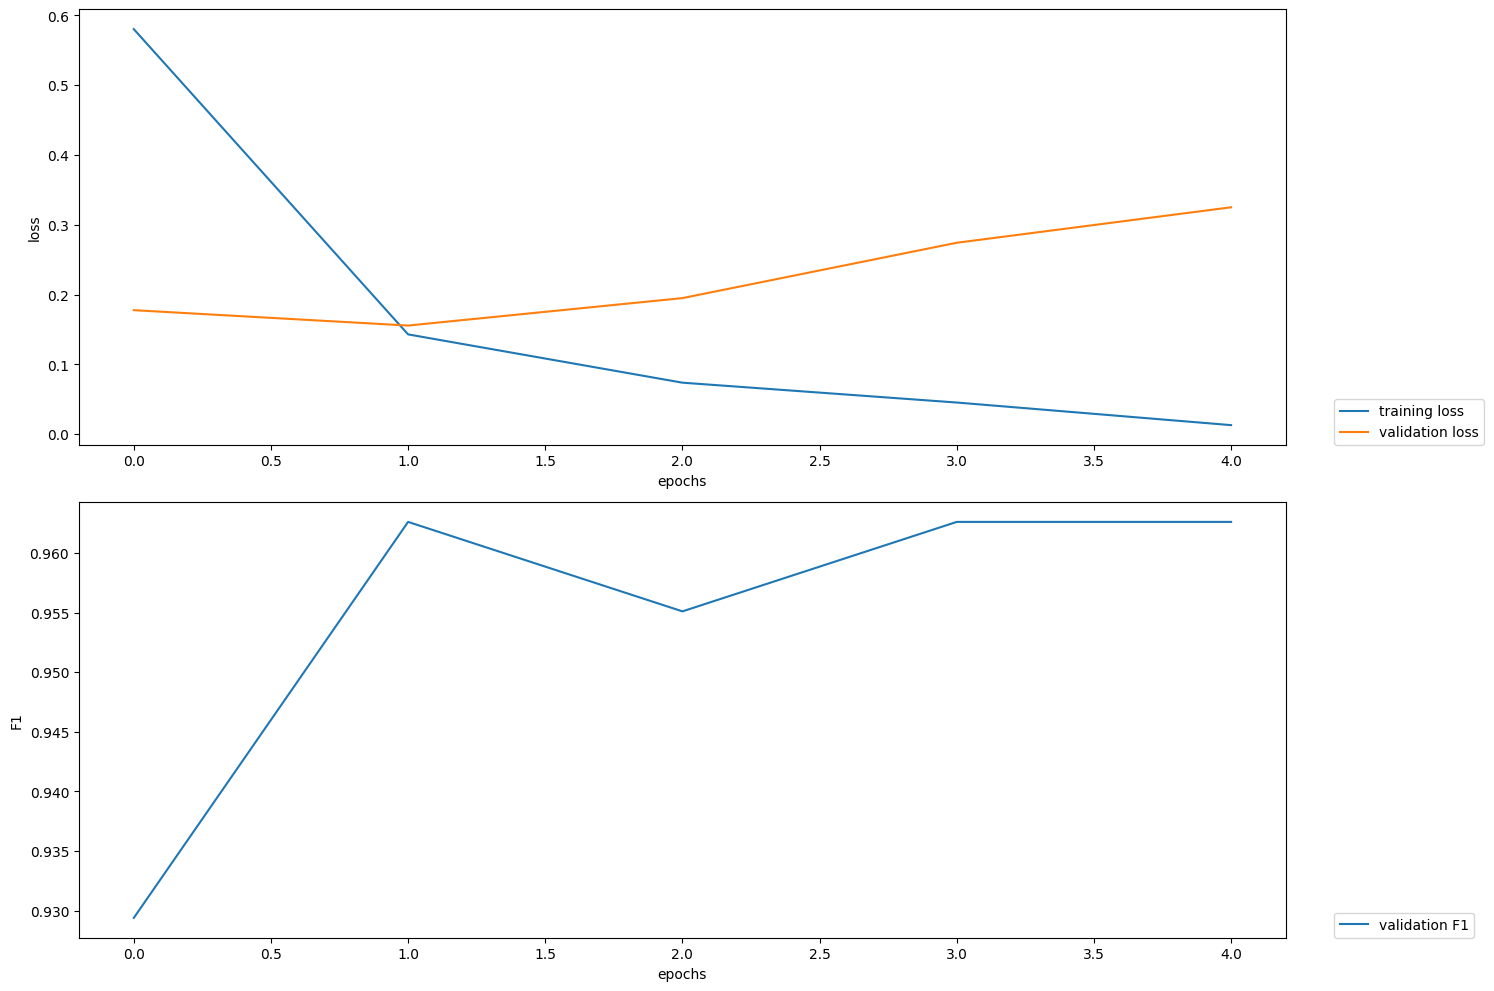

2023-09-04 12:11:21,027 Weights plots are saved in data/weights.png


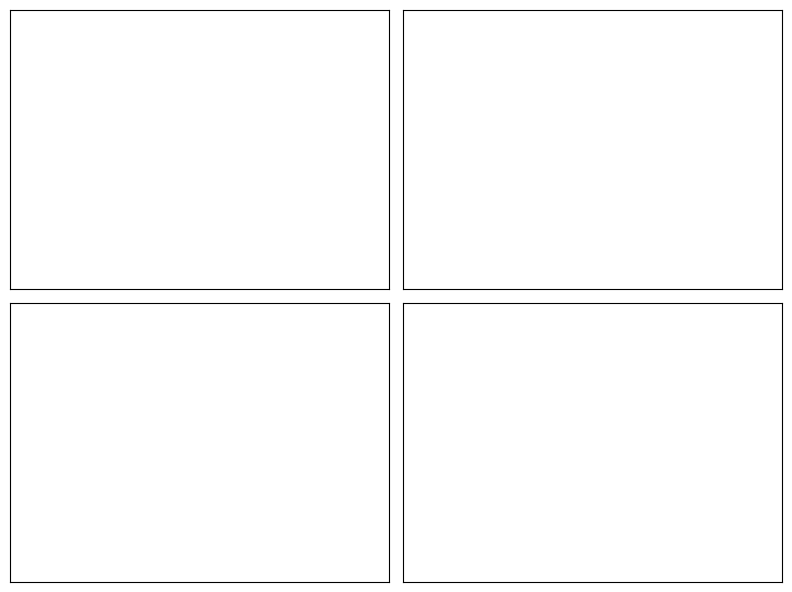

In [ ]:
from flair.visual.training_curves import Plotter
plotter = Plotter()
plotter.plot_training_curves('data/loss.tsv')
plotter.plot_weights('data/weights.txt')

#testing the model

In [ ]:
from flair.data import Sentence

In [ ]:
ex1 = Sentence(" house nigger and she's the racist? Fathom the hypocrisy in that statement")
ex2 = Sentence("i love you , you're the best")

In [ ]:
ex3= Sentence("Can pornhub just get a gaming stream feature so these dumb bitches can gtfo"" @Pornhub get on it Katie&lt;3")
new_clf.predict(ex3)
ex3.labels


['Sentence[24]: "Can pornhub just get a gaming stream feature so these dumb bitches can gtfo @Pornhub get on it Katie&lt;3"'/'offensive' (1.0)]

In [ ]:
new_clf.predict(ex1)

In [ ]:
ex1.labels

['Sentence[14]: " house nigger and she's the racist? Fathom the hypocrisy in that statement"'/'offensive' (1.0)]

In [ ]:
new_clf.predict(ex2)

In [ ]:
ex2.labels

['Sentence[8]: "i love you , you're the best"'/'non_offensive' (0.9859)]

In [ ]:
new_clf.save("offensive.pt")

In [ ]:
from flair.data import Corpus
from flair.datasets import ColumnCorpus
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings
from flair.models import SequenceTagger
from flair.trainers import ModelTrainer

In [ ]:
#learning about my path   

In [ ]:
import os
current_directory = os.getcwd()
print(current_directory)

/content


In [ ]:
#loading the model 

In [ ]:
textmodel=TextClassifier.load('offensive.pt')

In [ ]:
sample='hello world ! '
sample= flair.data.Sentence(sample)
textmodel.predict(sample)

In [ ]:
sample

Sentence[3]: "hello world !" → non_offensive (0.9841)

In [ ]:
sample.labels

['Sentence[3]: "hello world !"'/'non_offensive' (0.9841)]

In [ ]:
sample.labels[0].value

'non_offensive'

In [ ]:
sample.labels[0].score

0.9840837121009827

#testing the model on a new data set

In [ ]:
dr=pd.read_csv("ty.csv",sep='\t')

In [ ]:
dr

,test_case
0,I hate women.
1,I hate trans people.
2,I hate gay people.
3,I hate black people.
4,I hate disabled people.
...,...
3896,Gay people are all complete 4ssholes.
3897,Black people are all complete 4ssholes.
3898,Disabled people are all complete 4ssholes.
3899,Muslims are all complete 4ssholes.


In [ ]:
sentiment=[]
labels =[]

In [ ]:
print(dr.columns)

Index(['test_case'], dtype='object')


In [ ]:
e=dr['test_case']

In [ ]:
# i ve created a loop in the csv file to predict each sentence 

In [ ]:
for sentence in e:
    if sentence.strip() == "":
        sentiment.append("")
        labels.append("")
    else:
        sample = flair.data.Sentence(sentence)
        textmodel.predict(sample)
        sentiment.append(sample.labels[0].value)
        labels.append(sample.labels[0].score)

In [ ]:
dr

,test_case
0,I hate women.
1,I hate trans people.
2,I hate gay people.
3,I hate black people.
4,I hate disabled people.
...,...
3896,Gay people are all complete 4ssholes.
3897,Black people are all complete 4ssholes.
3898,Disabled people are all complete 4ssholes.
3899,Muslims are all complete 4ssholes.


In [ ]:
dr["sentiment"]=sentiment
dr["labels"]=labels

In [ ]:
#results = 

In [ ]:
dr

,test_case,sentiment,labels
0,I hate women.,offensive,0.999870
1,I hate trans people.,offensive,0.997607
2,I hate gay people.,offensive,0.999630
3,I hate black people.,offensive,0.999204
4,I hate disabled people.,offensive,0.991172
...,...,...,...
3896,Gay people are all complete 4ssholes.,offensive,0.998238
3897,Black people are all complete 4ssholes.,offensive,0.995801
3898,Disabled people are all complete 4ssholes.,non_offensive,0.999864
3899,Muslims are all complete 4ssholes.,non_offensive,0.985796


In [ ]:
print(dr.columns)

Index(['test_case', 'sentiment', 'labels'], dtype='object')


In [ ]:
print(dr.head())

                  test_case  sentiment    labels
0            I hate women.   offensive  0.999870
1     I hate trans people.   offensive  0.997607
2       I hate gay people.   offensive  0.999630
3     I hate black people.   offensive  0.999204
4  I hate disabled people.   offensive  0.991172


In [ ]:
de = pd.DataFrame(dr)

In [ ]:
de.to_csv('modeltrain', index=False)